In [16]:
from pathlib import Path

import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def zero_tree_encode(data):
    # 对数据进行小波变换
    coeffs = pywt.wavedec(data, 'db1')

    # 将非零系数和零系数分别存储到两个列表中
    non_zero_coeffs = [coeff for coeff in coeffs if coeff != 0]
    zero_coeffs = [coeff for coeff in coeffs if coeff == 0]

    # 对非零系数进行排序，并将它们转换为二进制字符串
    sorted_non_zero_coeffs = sorted([bin(int(round(coeff)))[2:].zfill(8) for coeff in non_zero_coeffs])

    # 对零系数进行编号，并将它们转换为二进制字符串
    num_zeros = len(zero_coeffs)
    binary_zeros = ''.join(['0' for _ in range(num_zeros)])

    # 将非零系数和零系数的二进制字符串拼接起来，形成最终的编码结果
    encoded_data = ''.join([binary_zeros] + sorted_non_zero_coeffs)

    return encoded_data

In [18]:
def zero_tree_decode(encoded_data):
    # 将编码后的数据按照非零系数和零系数的顺序拆分成两个部分
    binary_zeros = encoded_data[0]
    sorted_non_zero_coeffs = encoded_data[1:]

    # 对非零系数部分进行排序，并将其转换为十进制数
    non_zero_coeffs = [float(coeff) for coeff in sorted_non_zero_coeffs]
    num_zeros = len(binary_zeros)

    # 对零系数部分进行编号，并将其转换为十进制数
    zero_coeffs = [int(binary_zeros[i]) for i in range(num_zeros)]

    # 将非零系数和零系数合并起来，得到原始的一维数组
    decoded_data = [coeff if i == j else (0 if j == 0 else non_zero_coeffs[j-1]) for i, j, coeff in zip(range(len(non_zero_coeffs)), zero_coeffs, non_zero_coeffs)]

    return decoded_data

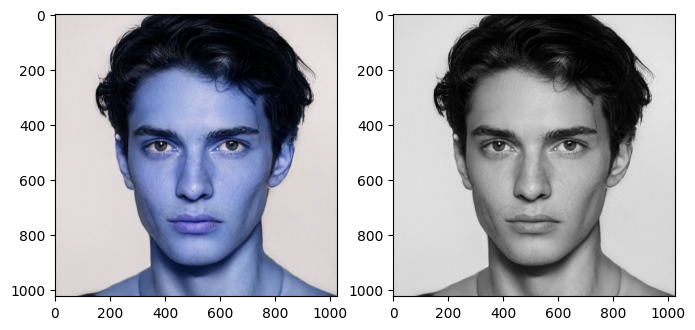

In [21]:
origin_img_path = Path("./img/src_img/man01.png")
origin_img = cv2.imread(str(origin_img_path))
gray_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(origin_img)
plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.show()

In [ ]:
zero_tree_encode(gray_img)

参考：[JPEG2000编码流程](https://blog.csdn.net/weixin_43876729/article/details/115485588)

In [22]:
# TODO：
# [ ]: 直流平移
# [ ]: 色彩分量变换
# [ ]: 使用不同的小波变换
# [ ]: 使用均匀标量量化
# [ ]: EBCOT编码
    # [ ]: Tier1 层编码
    # [ ]: Tier2 层编码
print("尝试使用Daubechies 9 / Daubechies 7 小波基来进行离散小波变换")

ValueError: Unknown wavelet name 'legall53', check wavelist() for the list of available builtin wavelets.